In [1]:
import pypsa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import math
import networkx as nx

In [ ]:
network_nodes = pd.read_csv('database/plotting_generators_substation.csv', sep = ",", quotechar = "'")

network_nodes

In [ ]:
basemap = folium.Map(location = [-0.152375, 113.899132], zoom_start = 6)

maxcapacity = max(network_nodes.p_nom)

for i in range(len(network_nodes)):
    popupinfo = (network_nodes.node.iloc[i]+ ",p_nom:" + str(network_nodes.p_nom.iloc[i]))
    folium.CircleMarker(location = [network_nodes.lat.iloc[i], network_nodes.lon.iloc[i]], 
                       tooltip = popupinfo, color = "green", fill = True, 
                       radius = math.sqrt(50 * network_nodes.p_nom.iloc[i] / maxcapacity)).add_to(basemap)
    
basemap.save("initial_nodes.html")

display(basemap)

In [ ]:
network_edges = pd.read_csv('database/plotting_edges_generators_edit.csv', sep = ",", quotechar = "'")

network_edges

In [ ]:
basemap = folium.Map(location = [-0.152375, 113.899132], zoom_start = 6)

maxcapacity = max(network_nodes.p_nom)

for i in range(len(network_nodes)):
    popupinfo = (network_nodes.node.iloc[i]+ ",p_nom:" + str(network_nodes.p_nom.iloc[i]))
    folium.CircleMarker(location = [network_nodes.lat.iloc[i], network_nodes.lon.iloc[i]], 
                       tooltip = popupinfo, color = "green", fill = True, 
                       radius = math.sqrt(20 * network_nodes.p_nom.iloc[i] / maxcapacity)).add_to(basemap)

for i in range(len(network_edges)):
    points = [[network_edges.lat0.iloc[i], network_edges.lon0.iloc[i]],
             [network_edges.lat1.iloc[i], network_edges.lon1.iloc[i]]]
    folium.PolyLine(points, color = "yellow", opacitiy = 0.7).add_to(basemap)
    
basemap.save("initial_network.html")

display(basemap)

In [ ]:
nodes_network = pd.read_csv('database/GENERATORS_01.csv', sep = ",", quotechar = "'")

nodes_network

In [2]:
network = pd.read_csv('database/generators_substation_edited_1.csv')

network

,type,node0,lon0,lat0,bus0,p_nom,carrier,voltage,type1,node1,lon1,lat1,bus1
0,generator,PLTD_Lemukutan,108.712,0.760,NaN,0.412,Oil,NaN,substation,GI_PLTU_2_Kalbar,108.8653,0.8300,3.0
1,generator,PLTU_Kalbar_1_Unit_1,108.846,0.815,NaN,125.000,Coal,NaN,substation,GI_PLTU_2_Kalbar,108.8653,0.8300,3.0
2,generator,PLTU_Kalbar_1_Unit_2,108.846,0.816,NaN,125.000,Coal,NaN,substation,GI_PLTU_2_Kalbar,108.8653,0.8300,3.0
3,generator,PLTU_Parit_Baru_Site_Bengkayang_#01,108.874,0.837,NaN,55.000,Coal,NaN,substation,GI_PLTU_2_Kalbar,108.8653,0.8300,3.0
4,generator,PLTU_Parit_Baru_Site_Bengkayang_#02,108.874,0.837,NaN,55.000,Coal,NaN,substation,GI_PLTU_2_Kalbar,108.8653,0.8300,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,generator,PLTBm_Talisayan_DL,118.177,1.605,NaN,0.260,Biomass,NaN,substation,GI_Sangatta,117.5693,0.4701,59.0
405,generator,PLTD_Derawan,118.243,2.286,NaN,1.270,Oil,NaN,substation,GI_Sangatta,117.5693,0.4701,59.0
406,generator,PLTS_Derawan,118.243,2.286,NaN,0.090,Oil,NaN,substation,GI_Sangatta,117.5693,0.4701,59.0
407,generator,PLTD_Batu_Putih,118.446,1.352,NaN,0.820,Oil,NaN,substation,GI_Sangatta,117.5693,0.4701,59.0


In [3]:
kalimantan_network = nx.from_pandas_edgelist(network, 'node0', 'node1', create_using = nx.Graph)

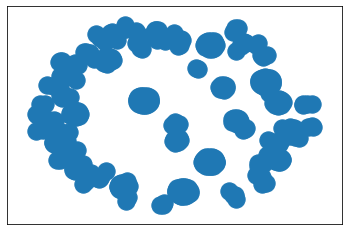

In [4]:
nx.draw_networkx(kalimantan_network, with_labels = False)

In [5]:
print(len(kalimantan_network.nodes))
kalimantan_network.nodes()

465


NodeView(('PLTD_Lemukutan', 'GI_PLTU_2_Kalbar', 'PLTU_Kalbar_1_Unit_1', 'PLTU_Kalbar_1_Unit_2', 'PLTU_Parit_Baru_Site_Bengkayang_#01', 'PLTU_Parit_Baru_Site_Bengkayang_#02', 'PLTD_Area_Singkawang', 'GI_Singkawang', 'PLTD_Sei_Wie', 'PLTD_Sudirman', 'PLTD_Sepuk_Laut', 'GI_Parit_Baru', 'PLTD_Tanjung_Saleh', 'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)', 'PLTD_Padang_Tikar', 'PLTBm_PT._Rezeki', 'PLTD_Sambas', 'GI_Sambas', 'PLTD_Siantan', 'GI_Siantan', 'PLTG_Siantan', 'PLTD_Sei_Raya', 'GI_Kota_Baru', 'PLTBm_PT_Harjohn_Timber', 'GI_Sei_Raya', 'PLTD_Dusun_Besar', 'PLTD_Bengkayang', 'GI_Bengkayang', 'PLTD_Batu_Ampar', 'PLTS_Temajuk', 'PLTD_Temajuk', 'PLTMH_Sajingan', 'PLTMH_Serawak_Energi_BHD_Sajingan_(B)', 'PLTD_Tanjung_Satai', 'GI_Tayan', 'PLTMH_Merasap', 'PLTD_Pulau_Limbung', 'PLTS_Pulau_Limbung', 'PLTD_Ngabang', 'PLTU_Ketapang_#01', 'PLTU_Ketapang_#02', 'PLTD_Teluk_Melano', 'PLTU_Tembilok_(IPP_Ketapang)_#01', 'PLTU_Tembilok_(IPP_Ketapang)_#02', 'PLTBm_PT_Alas_Kusuma', 'PLTD_Sukaharja', 'PLTD_Cempa

In [6]:
for index, row in network.iterrows():
    kalimantan_network.nodes[row['node0']]['coords'] = row['lon0'],row['lat0']
    kalimantan_network.nodes[row['node1']]['coords'] = row['lon1'],row['lat1']
    kalimantan_network.nodes[row['node0']]['type'] = row['type']
    kalimantan_network.nodes[row['node1']]['type'] = row['type1']

In [7]:
print(len(kalimantan_network.nodes))
print(kalimantan_network.nodes(data = True))

465
[('PLTD_Lemukutan', {'coords': (108.712, 0.76), 'type': 'generator'}), ('GI_PLTU_2_Kalbar', {'coords': (108.8653, 0.83), 'type': 'substation'}), ('PLTU_Kalbar_1_Unit_1', {'coords': (108.846, 0.815), 'type': 'generator'}), ('PLTU_Kalbar_1_Unit_2', {'coords': (108.846, 0.816), 'type': 'generator'}), ('PLTU_Parit_Baru_Site_Bengkayang_#01', {'coords': (108.874, 0.837), 'type': 'generator'}), ('PLTU_Parit_Baru_Site_Bengkayang_#02', {'coords': (108.874, 0.837), 'type': 'generator'}), ('PLTD_Area_Singkawang', {'coords': (108.98, 0.912), 'type': 'generator'}), ('GI_Singkawang', {'coords': (108.9876, 0.9266), 'type': 'substation'}), ('PLTD_Sei_Wie', {'coords': (108.987, 0.926), 'type': 'generator'}), ('PLTD_Sudirman', {'coords': (108.998, 0.911), 'type': 'generator'}), ('PLTD_Sepuk_Laut', {'coords': (109.078, -0.222), 'type': 'generator'}), ('GI_Parit_Baru', {'coords': (109.2055, 0.0592), 'type': 'substation'}), ('PLTD_Tanjung_Saleh', {'coords': (109.148, -0.108), 'type': 'generator'}), ('P

In [8]:
nx.get_node_attributes(kalimantan_network, 'coords')

{'PLTD_Lemukutan': (108.712, 0.76),
 'GI_PLTU_2_Kalbar': (108.8653, 0.83),
 'PLTU_Kalbar_1_Unit_1': (108.846, 0.815),
 'PLTU_Kalbar_1_Unit_2': (108.846, 0.816),
 'PLTU_Parit_Baru_Site_Bengkayang_#01': (108.874, 0.837),
 'PLTU_Parit_Baru_Site_Bengkayang_#02': (108.874, 0.837),
 'PLTD_Area_Singkawang': (108.98, 0.912),
 'GI_Singkawang': (108.9876, 0.9266),
 'PLTD_Sei_Wie': (108.987, 0.926),
 'PLTD_Sudirman': (108.998, 0.911),
 'PLTD_Sepuk_Laut': (109.078, -0.222),
 'GI_Parit_Baru': (109.2055, 0.0592),
 'PLTD_Tanjung_Saleh': (109.148, -0.108),
 'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)': (109.204, 0.059),
 'PLTD_Padang_Tikar': (109.272, 0.682),
 'PLTBm_PT._Rezeki': (109.286, 0.011),
 'PLTD_Sambas': (109.296, 1.36),
 'GI_Sambas': (109.2688, 1.3429),
 'PLTD_Siantan': (109.327, -0.002),
 'GI_Siantan': (109.328, -0.0002),
 'PLTG_Siantan': (109.327, -0.001),
 'PLTD_Sei_Raya': (109.38, -0.072),
 'GI_Kota_Baru': (109.2987, -0.0754),
 'PLTBm_PT_Harjohn_Timber': (109.447, -0.179),
 'GI_Sei_Raya': (109.

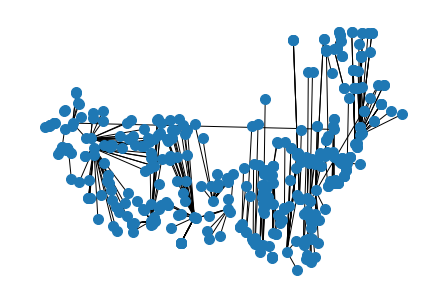

In [12]:
nx.draw(kalimantan_network, nx.get_node_attributes(kalimantan_network, 'coords'), with_labels = False, node_size = 100)

In [13]:
nx.get_node_attributes(kalimantan_network, 'type')

{'PLTD_Lemukutan': 'generator',
 'GI_PLTU_2_Kalbar': 'substation',
 'PLTU_Kalbar_1_Unit_1': 'generator',
 'PLTU_Kalbar_1_Unit_2': 'generator',
 'PLTU_Parit_Baru_Site_Bengkayang_#01': 'generator',
 'PLTU_Parit_Baru_Site_Bengkayang_#02': 'generator',
 'PLTD_Area_Singkawang': 'generator',
 'GI_Singkawang': 'substation',
 'PLTD_Sei_Wie': 'generator',
 'PLTD_Sudirman': 'generator',
 'PLTD_Sepuk_Laut': 'generator',
 'GI_Parit_Baru': 'substation',
 'PLTD_Tanjung_Saleh': 'generator',
 'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)': 'generator',
 'PLTD_Padang_Tikar': 'generator',
 'PLTBm_PT._Rezeki': 'generator',
 'PLTD_Sambas': 'generator',
 'GI_Sambas': 'substation',
 'PLTD_Siantan': 'generator',
 'GI_Siantan': 'substation',
 'PLTG_Siantan': 'generator',
 'PLTD_Sei_Raya': 'generator',
 'GI_Kota_Baru': 'substation',
 'PLTBm_PT_Harjohn_Timber': 'generator',
 'GI_Sei_Raya': 'substation',
 'PLTD_Dusun_Besar': 'generator',
 'PLTD_Bengkayang': 'generator',
 'GI_Bengkayang': 'substation',
 'PLTD_Batu_Ampar':

In [14]:
color_type_map = {'substation': 'r', 'generator': 'b'}

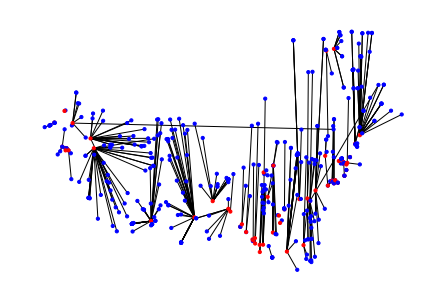

In [15]:
nx.draw(kalimantan_network, nx.get_node_attributes(kalimantan_network, 'coords'),
        node_color = [color_type_map[node[1]['type']]
                      for node in kalimantan_network.nodes(data=True)], with_labels = False, node_size = 10)

In [18]:
def substation_nodes(kalimantan_network, type, substation):

    result = []

    d = nx.get_node_attributes(kalimantan_network, type)

    for key, v in d.items():
        if(v == substation):
            result.append(key)

    return result

In [19]:
print(substation_nodes(kalimantan_network, 'type', 'substation'))

['GI_PLTU_2_Kalbar', 'GI_Singkawang', 'GI_Parit_Baru', 'GI_Sambas', 'GI_Siantan', 'GI_Kota_Baru', 'GI_Sei_Raya', 'GI_Bengkayang', 'GI_Tayan', 'GI_Ngabang', 'GI_Pangkalanbun', 'GI_Sampit', 'GI_Kasongan', 'GI_Palangkaraya', 'GI_Sebangau', 'GI_S_Mintin', 'GI_Pulau_Pisang', 'GI_Selat', 'GI_Seberang_Barito', 'GI_Trisakti', 'GI_Kayutangi', 'GI_Mantuil', 'GI_Bandara', 'GI_Pelaihari', 'GI_Cempaka', 'GI_Muara_Teweh', 'GI_Buntok', 'GI_Asam-asam', 'GI_Rantau', 'GI_Bangkanai', 'GI_Amuntai', 'GI_Barikin', 'GI_Tanjung', 'GI_Satui', 'GI_Muara_Komam', 'GI_Batulicin', 'GI_Kuaro', 'GI_Grogot', 'GI_Longikis', 'GI_Malinau', 'GI_Kotabangun', 'GI_Petung', 'GI_Kariangau', 'GI_Industri', 'GI_Karangjoang', 'GI_Tideng_Pale', 'GI_Manggar_Sari', 'GI_Bukit_Biru', 'GI_Embalut', 'GI_Harapan_Baru', 'GI_Tengkawang', 'GI_Senipah', 'GI_Bukuan', 'GI_Muara_Jawa', 'GI_Sambutan', 'GI_Muara_Badak', 'GI_Teluk_Pandan', 'GI_Sangatta']


In [20]:
from itertools import product

In [21]:
def generator_nodes(kalimantan_network, type, generator):

    result = []

    d = nx.get_node_attributes(kalimantan_network, type)

    for key, v in d.items():
        if(v == generator):
            result.append(key)

    return result

In [22]:
print(generator_nodes(kalimantan_network, 'type', 'generator'))

['PLTD_Lemukutan', 'PLTU_Kalbar_1_Unit_1', 'PLTU_Kalbar_1_Unit_2', 'PLTU_Parit_Baru_Site_Bengkayang_#01', 'PLTU_Parit_Baru_Site_Bengkayang_#02', 'PLTD_Area_Singkawang', 'PLTD_Sei_Wie', 'PLTD_Sudirman', 'PLTD_Sepuk_Laut', 'PLTD_Tanjung_Saleh', 'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)', 'PLTD_Padang_Tikar', 'PLTBm_PT._Rezeki', 'PLTD_Sambas', 'PLTD_Siantan', 'PLTG_Siantan', 'PLTD_Sei_Raya', 'PLTBm_PT_Harjohn_Timber', 'PLTD_Dusun_Besar', 'PLTD_Bengkayang', 'PLTD_Batu_Ampar', 'PLTS_Temajuk', 'PLTD_Temajuk', 'PLTMH_Sajingan', 'PLTMH_Serawak_Energi_BHD_Sajingan_(B)', 'PLTD_Tanjung_Satai', 'PLTMH_Merasap', 'PLTD_Pulau_Limbung', 'PLTS_Pulau_Limbung', 'PLTD_Ngabang', 'PLTU_Ketapang_#01', 'PLTU_Ketapang_#02', 'PLTD_Teluk_Melano', 'PLTU_Tembilok_(IPP_Ketapang)_#01', 'PLTU_Tembilok_(IPP_Ketapang)_#02', 'PLTBm_PT_Alas_Kusuma', 'PLTD_Sukaharja', 'PLTD_Cempaka_Putih', 'PLTS_Sidding', 'PLTD_Teraju', 'PLTD_Kendawangan_Kanan', 'PLTD_Ulak_Medang', 'PLTA_SESCO_275', 'PLTMH_Serawak_Energi_BHD_Balai_Karangan_(B)

In [29]:
nx.voronoi_cells(kalimantan_network, substation_nodes(kalimantan_network, 'type', 'substation'))

{'GI_PLTU_2_Kalbar': {'GI_PLTU_2_Kalbar',
  'PLTD_Lemukutan',
  'PLTU_Kalbar_1_Unit_1',
  'PLTU_Kalbar_1_Unit_2',
  'PLTU_Parit_Baru_Site_Bengkayang_#01',
  'PLTU_Parit_Baru_Site_Bengkayang_#02'},
 'GI_Singkawang': {'GI_Singkawang',
  'PLTD_Area_Singkawang',
  'PLTD_Sei_Wie',
  'PLTD_Sudirman'},
 'GI_Parit_Baru': {'GI_Parit_Baru',
  'PLTBm_PT._Rezeki',
  'PLTD_Padang_Tikar',
  'PLTD_Sepuk_Laut',
  'PLTD_Tanjung_Saleh',
  'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)'},
 'GI_Sambas': {'GI_Sambas', 'PLTD_Sambas'},
 'GI_Siantan': {'GI_Siantan', 'PLTD_Siantan', 'PLTG_Siantan'},
 'GI_Kota_Baru': {'GI_Kota_Baru', 'PLTD_Sei_Raya'},
 'GI_Sei_Raya': {'GI_Sei_Raya', 'PLTBm_PT_Harjohn_Timber', 'PLTD_Dusun_Besar'},
 'GI_Bengkayang': {'GI_Bengkayang',
  'PLTD_Batu_Ampar',
  'PLTD_Bengkayang',
  'PLTD_Ngabang',
  'PLTD_Temajuk',
  'PLTMH_Merasap',
  'PLTMH_Sajingan',
  'PLTMH_Serawak_Energi_BHD_Sajingan_(B)',
  'PLTS_Temajuk'},
 'GI_Tayan': {'GI_Tayan',
  'PLTBm_PT_Alas_Kusuma',
  'PLTD_Air_Hitam',
  'PLTD_A